<center>
<a href="https://exed.polytechnique.edu/fr" ><img src="https://exed.polytechnique.edu/sites/all/themes/college/images/logo.png" style="float:left; max-width: 360px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Scénarios d'Apprentissage Statistique](https://github.com/wikistat/Apprentissage)

# GRC: Score d'appétence d'un produit bancaire  en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

#### Résumé
Les données sont composées de 825 clients d'une banque décrits par 32 variables concernant leurs avoirs, et utilisations de leurs comptes. Le premier objectif est une exploration du jeu de données, une segmentation ou profilage des types de comportement des clients, le 2ème consiste à estimer puis prévoir un *score d'appétence* pour un produit bancaie, ici la carte visa premier. Comparaison des différentes méthodes et algorihtmes d'apprentissage pour atteindre cet objectif de la régression logistique au *boosting* (*extrem gradient*) en passant par les arbres, les SVM ou random forest. Une procédure de validation croisée généralisée est itérée sur une selection de ces méthodes. Celles d'agrégation de modèles conduisent aux meilleurs résultats. 

## Introduction


### Présentation des données
#### Les variables
La liste des variables est issue d'une base de données retraçant l'historique mensuel bancaire et les caractéristiques de tous les clients. Un sondage a été réalisé afin d'alléger les traitements ainsi qu'une première sélection de variables. Les variables contenues dans le fichier initial sont décrites dans le tableau ci-dessous. Elles sont observées sur 1425 clients.

*Tableau: Liste des variables initiales et de leur libellé* Attention, certains sont écrits en majuscules dans les programmes puis en minuscules après transfomation des données (logarithme, recodage) au cours d ela phase d'exploration. Les noms des variables logarithmes des variables quantitatives se terminent par `L`les variables qualitatives se terminent par `Q`ou `q`. 

**Identifiant** | **Libellé**
           --|--
`sexeq` | Sexe (qualitatif) 
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`nptag` | Nombre de cartes point argent
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd | Nombre de jours à débit à M
**`carvp`** | **Possession de la carte VISA Premier**



## Préparation des données
### Lecture 
Les données sont disponibles dans le répertoire de ce calepin et chargées en même temps. Elles sont issues de la première phase de [prétraitement](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-R-Visa.ipynb) ou *data munging* pour détecter, corriger les erreurs et incohérences, éliminer des redondances, traiter les données manquantes, transformer certaines variables. 

In [1]:
# Importation des librairies.
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [2]:
# Lecture d'un data frame
vispremv = pd.read_table('vispremv.dat', delimiter=' ')
vispremv.shape
def send():
    return()

In [3]:
vispremv.head()

,SEXEQ,FAMIQ,PCSPQ,kvunbq,vienbq,uemnbq,xlgnbq,ylvnbq,rocnbq,nptagq,...,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL,CARVP
148009,Shom,Fcou,Pint,K1,V1,U2,X2,Y2,R1,N0,...,2,13.161865,2,12.110635,14,0,14.080718,13.230263,0.693147,Coui
552427,Shom,Fcou,Pint,K0,V0,U1,X0,Y1,R0,N0,...,0,0.000000,1,8.132413,0,0,11.717872,0.000000,0.000000,Coui
556005,Shom,Fseu,Psan,K0,V0,U2,X1,Y2,R1,N0,...,1,10.743178,2,10.309286,14,0,11.329303,0.000000,0.000000,Coui
556686,Shom,Fseu,Pouv,K0,V1,U2,X2,Y2,R1,N1,...,3,12.899220,2,11.203025,11,1,13.111856,9.972267,2.772589,Coui
642680,Shom,Fcou,Pint,K0,V0,U2,X1,Y2,R1,N0,...,1,10.457976,2,9.190546,27,0,11.304904,0.000000,1.386294,Coui


In [4]:
vispremv['PCSPQ'].unique()

array(['Pint', 'Psan', 'Pouv', 'Pemp', 'Pcad'], dtype=object)

In [5]:
# Variables quantitatives
vispremv.describe()

,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,GAGEML,KVUNB,...,UEMNB,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,...,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,132.574788,42.573848,0.627211,2.371296,6.715418,0.827903,4.477338,1.868891,2.394713,1.028222,...,1.468485,0.649106,4.161701,0.760113,4.726685,8.564440,0.136406,9.373976,3.043170,1.189791
std,93.499830,11.912343,0.685315,1.464376,4.907295,1.279475,5.473534,3.680483,4.540024,0.501554,...,1.280262,0.794352,5.205502,0.782235,4.662683,11.738092,0.379837,3.313518,4.665580,1.587594
min,-2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.500000,33.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.067305,0.000000,0.000000
50%,130.000000,43.000000,0.693147,2.564949,8.652248,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,4.882802,2.000000,0.000000,10.075969,0.000000,0.000000
75%,204.500000,52.000000,1.098612,3.349750,10.962298,1.945910,10.483833,0.000000,0.000000,1.000000,...,2.000000,1.000000,10.033572,1.000000,9.651494,14.000000,0.000000,11.649131,6.216606,2.441401
max,393.000000,65.000000,3.367296,7.451242,13.785052,4.605170,15.060512,13.123924,14.296852,4.000000,...,9.000000,4.000000,13.270100,4.000000,13.785052,69.000000,4.000000,16.045468,15.770893,4.905275


Vérifier ci-dessous que la plupart des variables ont deux versions, l'une quantitative et l'autre qualitative. 

Les variables qualitatives (sexe, csp, famille) sont transformées en indicatrices à l'exception de la cible `CARVP`.

In [6]:
vispremv.AGER.head(), vispremv.ageq.head(), 

(148009    51
 552427    58
 556005    27
 556686    49
 642680    64
 Name: AGER, dtype: int64, 148009    A2
 552427    A2
 556005    A0
 556686    A1
 642680    A2
 Name: ageq, dtype: object)

In [7]:
vispremv.dtypes

SEXEQ      object
FAMIQ      object
PCSPQ      object
kvunbq     object
vienbq     object
uemnbq     object
xlgnbq     object
ylvnbq     object
rocnbq     object
nptagq     object
endetq     object
gagetq     object
facanq     object
lgagtq     object
havefq     object
jnbjdq     object
ageq       object
relatq     object
qsmoyq     object
opgnbq     object
moyrvq     object
tavepq     object
dmvtpq     object
boppnq     object
itavcq     object
RELAT       int64
AGER        int64
OPGNBL    float64
MOYRVL    float64
TAVEPL    float64
ENDETL    float64
GAGETL    float64
GAGECL    float64
GAGEML    float64
KVUNB       int64
QSMOY       int64
QCREDL    float64
DMVTPL    float64
BOPPNL    float64
FACANL    float64
LGAGTL    float64
VIENB       int64
VIEMTL    float64
UEMNB       int64
XLGNB       int64
XLGMTL    float64
YLVNB       int64
YLVMTL    float64
ROCNB       int64
NPTAG       int64
ITAVCL    float64
HAVEFL    float64
JNBJDL    float64
CARVP      object
dtype: object

In [9]:
# Transformation en indicatrices
vispremDum = pd.get_dummies(vispremv[["SEXEQ", "FAMIQ", "PCSPQ"]])
# Une seule est conservée pour les variables binaires
vispremDum.drop(["SEXEQ_Sfem", "FAMIQ_Fseu"], axis=1, inplace=True)
# Sélection des variables numériques
vispremNum = vispremv.select_dtypes(exclude=['object'])
# Concaténation des variables retenues
vispremR = pd.concat([vispremDum, vispremNum], axis=1)
print(vispremR.columns)

Index(['SEXEQ_Shom', 'FAMIQ_Fcou', 'PCSPQ_Pcad', 'PCSPQ_Pemp', 'PCSPQ_Pint',
       'PCSPQ_Pouv', 'PCSPQ_Psan', 'RELAT', 'AGER', 'OPGNBL', 'MOYRVL',
       'TAVEPL', 'ENDETL', 'GAGETL', 'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY',
       'QCREDL', 'DMVTPL', 'BOPPNL', 'FACANL', 'LGAGTL', 'VIENB', 'VIEMTL',
       'UEMNB', 'XLGNB', 'XLGMTL', 'YLVNB', 'YLVMTL', 'ROCNB', 'NPTAG',
       'ITAVCL', 'HAVEFL', 'JNBJDL'],
      dtype='object')


In [10]:
# La variable à expliquer est recodée
y=vispremv["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)

**Q** Combien d'individus et combien de variables sont finalement concernés? 

In [11]:
print(vispremR.shape)

scaler = StandardScaler()

scaler.fit(vispremR)
X_train_scaled = scaler.transform(vispremR)
#X_test_scaled = scaler.transform(X_test)

(1063, 35)


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca_obj=pca.fit_transform(X_train_scaled)
#Pourcentage de variance expliquée par les axes retenus.
sum(pca.explained_variance_ratio_)


0.9099555733788278

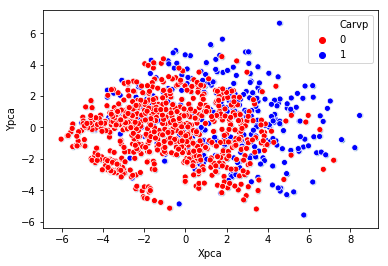

In [13]:
pca_df = pd.DataFrame({'Xpca':pca_obj[:,0],
                        'Ypca':pca_obj[:,1],
                        'Carvp':y})
pca_df.head()
sns.scatterplot(x="Xpca", y="Ypca",
              data=pca_df);
sns.scatterplot(x="Xpca", y="Ypca",
              hue="Carvp",
              palette=['red','blue'],
              legend='full',
              data=pca_df);

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=0)
tsne_obj= tsne.fit_transform(X_train_scaled)

In [16]:
tsne_df = pd.DataFrame({'Xtsne':tsne_obj[:,0],
                        'Ytsne':tsne_obj[:,1],
                        'Carvp':y})
tsne_df.head()

,Xtsne,Ytsne,Carvp
148009,-3.550498,8.111454,1
552427,14.553095,-12.513491,1
556005,-0.809978,17.251547,1
556686,-1.497649,13.123475,1
642680,4.984999,2.959355,1


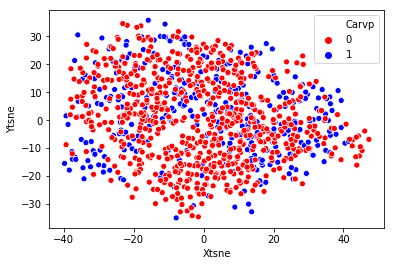

In [31]:
sns.scatterplot(x="Xtsne", y="Ytsne",
              hue="Carvp",
              palette=['red','blue'],
              legend='full',
              data=tsne_df);
#Le résultat semble bien moins convaincant

## Début de l'apprentissage
On s'intéresse aux données brutes et on utilise la régression logistique dans un premier temps



In [54]:
rd_seed=111 # Modifier cette valeur d'initialisation
npop=len(vispremv)
xApp,xTest,yApp,yTest=train_test_split(X_train_scaled,y,test_size=200,random_state=rd_seed)
xApp.shape


(863, 35)

In [55]:
from sklearn.linear_model import LogisticRegression
# Grille de valeurs du paramètre de pénalisaiton
param=[{"C":[0.5,1,5,10,12,15,30]}]
logitL = GridSearchCV(LogisticRegression(penalty="l1",solver='liblinear'), param,cv=5,n_jobs=-1)
logitLasso=logitL.fit(xApp, yApp)

In [56]:
# Sélection du paramètre optimal
logitLasso.best_params_["C"]
print("Meilleur score (apprentissage) = %f, Meilleur paramètre = %s" %
      (1.-logitLasso.best_score_,logitLasso.best_params_))


Meilleur score (apprentissage) = 0.163342, Meilleur paramètre = {'C': 30}


In [57]:
logitL


GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             n_jobs=-1, param_grid=[{'C': [0.5, 1, 5, 10, 12, 15, 30]}])

In [66]:
LassoOpt=LogisticRegression(penalty="l1",solver='liblinear',C=30)
LassoOpt=LassoOpt.fit(xApp, yApp)
# Récupération des coefficients
vect_coef=np.matrix.transpose(LassoOpt.coef_)
vect_coef=vect_coef.ravel()
#Affichage des 25 plus importants
coef=pd.Series(abs(vect_coef),index=vispremR.columns).sort_values(ascending=False)
print(coef)

UEMNB         1.967335
BOPPNL        1.605973
XLGNB         1.420109
QCREDL        0.899140
YLVNB         0.754917
SEXEQ_Shom    0.711962
PCSPQ_Pcad    0.690760
ENDETL        0.650213
KVUNB         0.643540
RELAT         0.639564
XLGMTL        0.609465
MOYRVL        0.549569
PCSPQ_Psan    0.521380
OPGNBL        0.475034
ROCNB         0.462988
YLVMTL        0.427306
NPTAG         0.392211
FACANL        0.371390
HAVEFL        0.324330
GAGECL        0.322787
TAVEPL        0.286003
GAGETL        0.267723
ITAVCL        0.256461
PCSPQ_Pouv    0.198833
GAGEML        0.191679
VIENB         0.157447
QSMOY         0.155640
DMVTPL        0.147078
JNBJDL        0.142369
PCSPQ_Pint    0.123693
PCSPQ_Pemp    0.119320
LGAGTL        0.100006
VIEMTL        0.071498
AGER          0.059287
FAMIQ_Fcou    0.042944
dtype: float64


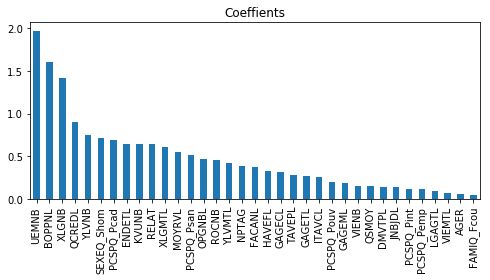

In [68]:
plt.figure(figsize=(7,4))
coef.plot(kind='bar')
plt.title('Coeffients')
plt.tight_layout()
plt.show()

In [47]:
# Prévision
yChap = logitLasso.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur sur l'échantillon test
print("Erreur de test régression Lasso = %f" % (1-logitLasso.score(xTest, yTest)))

CARVP    0   1
row_0         
0      117  18
1       15  50
Erreur de test régression Lasso = 0.165000


## Algorithme de plus proche voisins



In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
# Définition du modèle
disKnn=knn.fit(xApp, yApp)
# Prévision de l'échantillon test
yChap = disKnn.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur de prévision sur le test
print("Erreur de test knn = %f" % (1-disKnn.score(xTest,yTest)))


CARVP    0   1
row_0         
0      123  36
1        9  32
Erreur de test knn = 0.225000


In [26]:
#Optimisation du paramètre de complexité k
#Grille de valeurs
param_grid=[{"n_neighbors":list(range(1,15))}]
disKnn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
disKnnOpt=disKnn.fit(xApp, yApp) # GridSearchCV est lui même un estimateur
# paramètre optimal
disKnnOpt.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-disKnnOpt.best_score_,disKnnOpt.best_params_))

Meilleur score = 0.223679, Meilleur paramètre = {'n_neighbors': 9}


In [ ]:
# Prévision de l'échantillon test
yChap = disKnnOpt.predict(xTest)
table=pd.crosstab(yChap,yTest)
print(table)

# Estimation de l'erreur de prévision sur l'échantillon test
print("Erreur de test knn_opt = %f" % (1-disKnnOpt.score(xTest,yTest)))

### On peut faire la même chose sur les données issues de l'ACP
On reprend rapidement le code précédent. La prédiction



In [39]:
Xpca=pca_obj

xpcaApp,xpcaTest,yApp,yTest=train_test_split(Xpca,y,test_size=200,random_state=rd_seed)
xpcaApp.shape


param=[{"C":[0.25,0.5,0.75,1,5,10,12,15,30]}]
logitL = GridSearchCV(LogisticRegression(penalty="l1",solver='liblinear'), param,cv=5,n_jobs=-1)
logitLasso=logitL.fit(xpcaApp, yApp)

In [40]:
# Sélection du paramètre optimal
logitLasso.best_params_["C"]
print("Meilleur score (apprentissage) = %f, Meilleur paramètre = %s" %
      (1.-logitLasso.best_score_,logitLasso.best_params_))


Meilleur score (apprentissage) = 0.179594, Meilleur paramètre = {'C': 0.25}


In [41]:
# Prévision
yChap = logitLasso.predict(xpcaTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur sur l'échantillon test
print("Erreur de test régression Lasso = %f" % (1-logitLasso.score(xpcaTest, yTest)))


CARVP    0   1
row_0         
0      113  24
1       19  44
Erreur de test régression Lasso = 0.215000


### On peut faire la même chose sur les données issues de l'ACP avec les plus proches voisins
Cette fois, on améliore (légèrement) la prévision.



In [52]:
knn=KNeighborsClassifier(n_neighbors=10)
# Définition du modèle
disKnn=knn.fit(xpcaApp, yApp)
# Prévision de l'échantillon test
yChap = disKnn.predict(xpcaTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur de prévision sur le test
print("Erreur de test knn = %f" % (1-disKnn.score(xpcaTest,yTest)))


CARVP    0   1
row_0         
0      122  33
1       10  35
Erreur de test knn = 0.215000
